In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Supermarket Purchase_ML project.csv')
data.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


In [4]:
# check the null values in the data set
data.isna().sum()

Cust_id                         0
AVG_Actual_price_12             0
Purchase_Value                  0
No_of_Items                     0
Total_Discount                  0
MONTH_SINCE_LAST_TRANSACTION    0
dtype: int64

In [5]:
data.describe()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


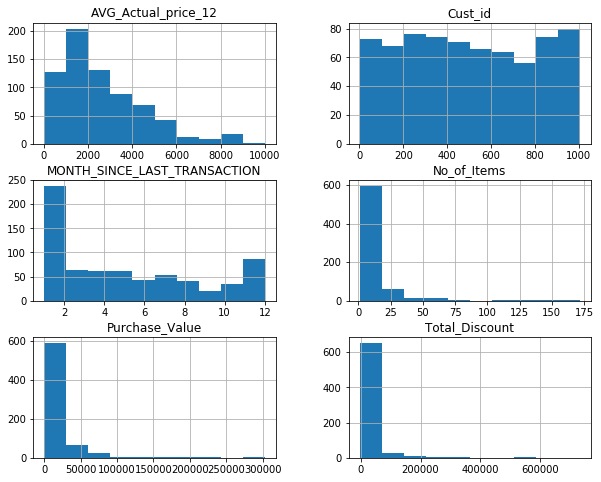

In [6]:
data.hist(figsize = (10,8))
plt.show()

# Observations

More number of revisits are happening within 2 months

More numbers discounts were under 1 lakh itself

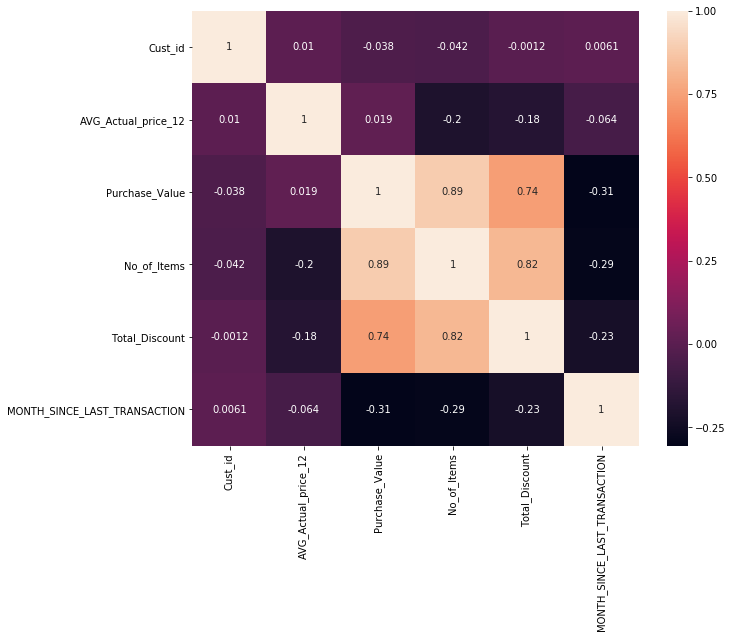

In [7]:
figsize=[10,8]
plt.figure(figsize=figsize)
sns.heatmap(data.corr(),annot=True)
plt.show()

# Observations from above heatmap

1) purchase_Value & No_of_items are positively corelated (0.89) that is directly related. As No of items increases purchase value also increases in the same way if no of items decreases purchase value also decreases

2) No_of_items & Total_Discount are positively corelated (0.82) that is directly related. As No of items increases the total discount also increases and viceversa

3) purchase_Value & Total_Discount are positively corelated (0.74) that is directly related. As the purchase value is high the total discount on the purchase value will also be high and viceversa

In [8]:
#drop the customer id from the given data becuase it is a unique id for each customer so clustering it doesn't make sense.
data.drop(['Cust_id'],axis=1,inplace=True)
data.head()

,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,300.000000,1200.00,4,0.00,11
1,2563.282500,41012.52,16,78737.48,2
2,3510.000000,7020.00,2,780.00,4
3,4530.000000,13590.00,3,1510.00,1
4,2428.076923,33455.00,15,17445.00,6


In [9]:
data.head()

,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,300.000000,1200.00,4,0.00,11
1,2563.282500,41012.52,16,78737.48,2
2,3510.000000,7020.00,2,780.00,4
3,4530.000000,13590.00,3,1510.00,1
4,2428.076923,33455.00,15,17445.00,6


# Finding clusters with elbow method

In [11]:
from sklearn.cluster import KMeans

In [30]:
ssw = []
cluster_range = range(1,10)
for i in cluster_range : 
    model = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    model.fit(data)
    ssw.append(model.inertia_)

In [31]:
ssw

[3236693429073.9766,
 1224767172643.2368,
 804918938681.802,
 532908393267.1747,
 450619386856.17395,
 373177190691.3494,
 314558109212.57086,
 262352717230.3674,
 228156002013.44653]

In [32]:
ssw_df = pd.DataFrame({'Number of clusters': cluster_range,'ssw':ssw})
ssw_df

,Number of clusters,ssw
0,1,3.236693e+12
1,2,1.224767e+12
2,3,8.049189e+11
3,4,5.329084e+11
4,5,4.506194e+11
5,6,3.731772e+11
6,7,3.145581e+11
7,8,2.623527e+11
8,9,2.281560e+11


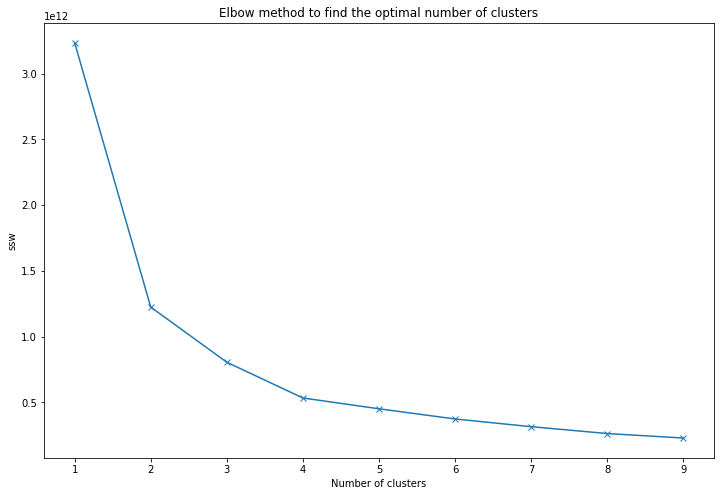

In [33]:
plt.figure(figsize=(12,8))
plt.plot(cluster_range,ssw,marker='x')
plt.title('Elbow method to find the optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('ssw')
plt.show()

In [34]:
# we will continue with our analysis with n_clusters=
kmeans = KMeans(n_clusters=4,init = 'k-means++',n_init=10,random_state=0)
# fit the model
k_model = kmeans.fit(data)

In [19]:
# show each row/observation is contained in which clusters
clusters = k_model.labels_
clusters

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [20]:
clusters.shape

(702,)

In [21]:
data['clusters'] = clusters
print(data.head())
print(data.tail())

   AVG_Actual_price_12  Purchase_Value  No_of_Items  Total_Discount  \
0           300.000000         1200.00            4            0.00   
1          2563.282500        41012.52           16        78737.48   
2          3510.000000         7020.00            2          780.00   
3          4530.000000        13590.00            3         1510.00   
4          2428.076923        33455.00           15        17445.00   

   MONTH_SINCE_LAST_TRANSACTION  clusters  
0                            11         1  
1                             2         0  
2                             4         1  
3                             1         1  
4                             6         1  
     AVG_Actual_price_12  Purchase_Value  No_of_Items  Total_Discount  \
697             2210.000         8840.00            4        11960.00   
698             2500.000         2500.00            1            0.00   
699              347.045          694.09            2          605.91   
700             3

In [22]:
# size of each cluster
data['clusters'].value_counts()

1    573
0    105
3     18
2      6
Name: clusters, dtype: int64

In [23]:
data.columns

Index(['AVG_Actual_price_12', 'Purchase_Value', 'No_of_Items',
       'Total_Discount', 'MONTH_SINCE_LAST_TRANSACTION', 'clusters'],
      dtype='object')

In [24]:
# centroid of each clusters.cluster
centroid = pd.DataFrame(k_model.cluster_centers_,columns = ['AVG_Actual_price_12', 'Purchase_Value', 'No_of_Items',
       'Total_Discount', 'MONTH_SINCE_LAST_TRANSACTION'])
centroid

,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,2065.670230,45753.136857,26.114286,48482.606000,2.952381
1,2787.115430,9705.346440,4.561955,5298.445881,5.546248
2,2019.020024,229672.693333,121.000000,498877.576667,1.166667
3,1626.314582,120600.307778,80.222222,193672.303333,2.000000


# Insights

Discounts(high to low level) should be in the following order to get more customers to revisit the store

Cluster 1 > cluster 0 > cluster 3 > cluster 2

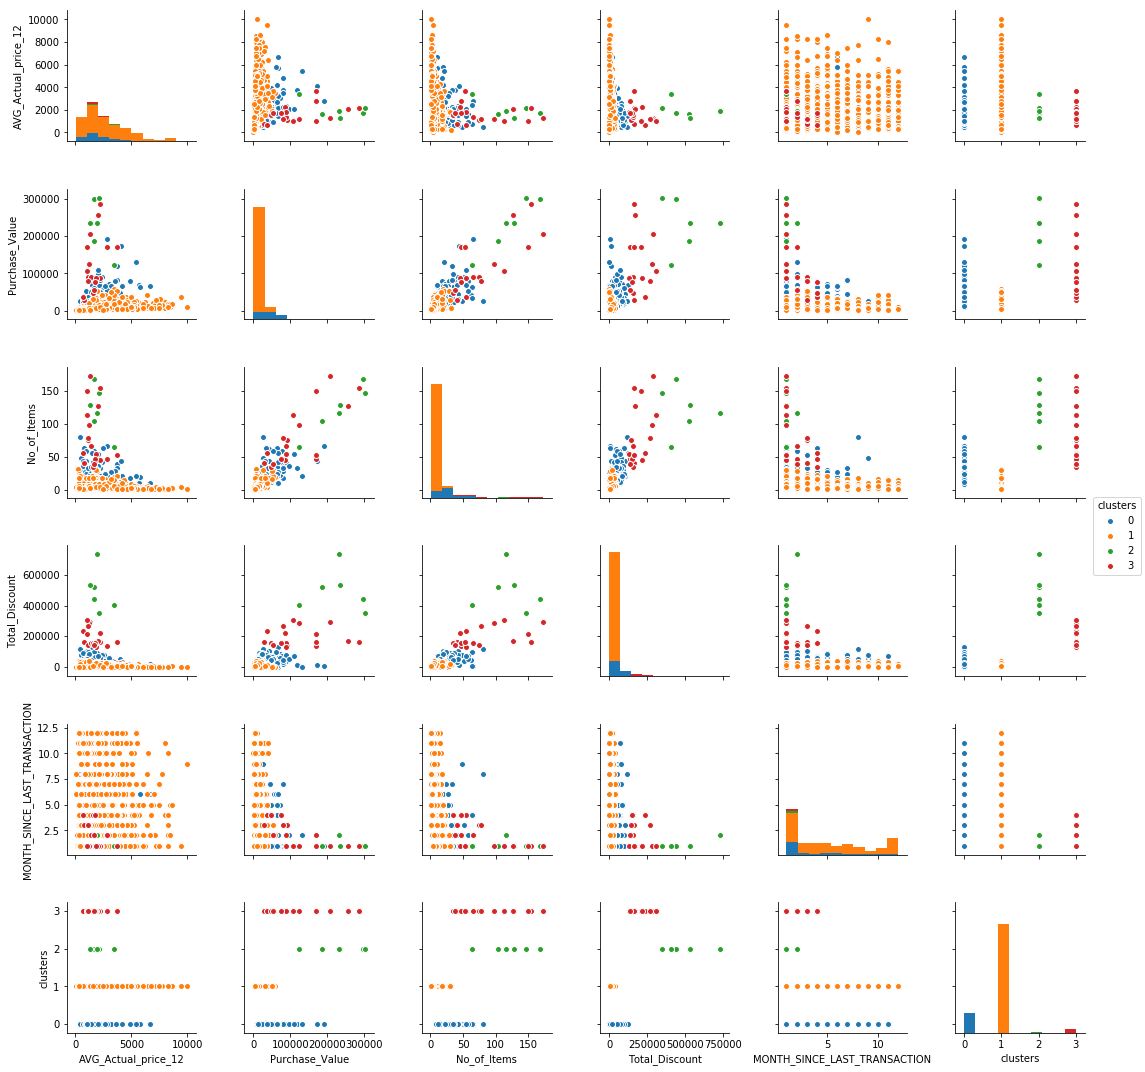

In [25]:
# visualize the cluster based on each pair of columns
sns.pairplot(data,hue='clusters')
plt.show()

# END